In [ ]:
# Assignment Task:
# Your task is to perform a multiple linear regression analysis 
# to predict the price of Toyota corolla based on the given attributes.

In [ ]:
# Dataset Description:
# The dataset consists of the following variables:
# Age: Age in years
# KM: Accumulated Kilometers on odometer
# FuelType: Fuel Type (Petrol, Diesel, CNG)
# HP: Horse Power
# Automatic: Automatic ( (Yes=1, No=0)
# CC: Cylinder Volume in cubic centimeters
# Doors: Number of doors
# Weight: Weight in Kilograms
# Quarterly_Tax: 
# Price: Offer Price in EUROs

In [3]:
# Import libraries and dataset

import pandas as pd
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
# Exploratory data analyis

df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [7]:
df.shape

(1436, 11)

In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [10]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [11]:
df.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

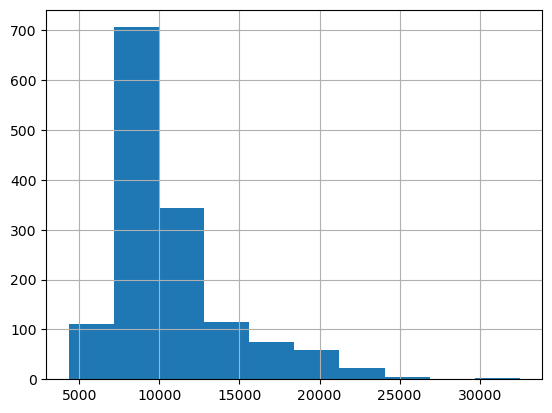

In [12]:
# Variable visualizations using histogram

df['Price'].hist()

<Axes: >

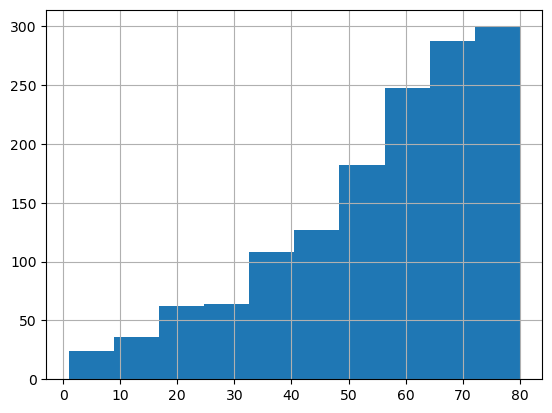

In [13]:
df['Age_08_04'].hist()

<Axes: >

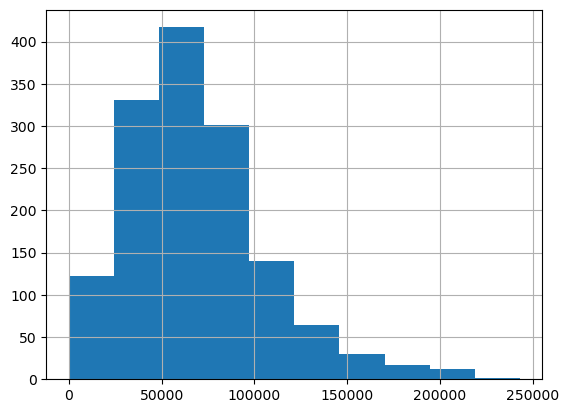

In [14]:
df['KM'].hist()

<Axes: >

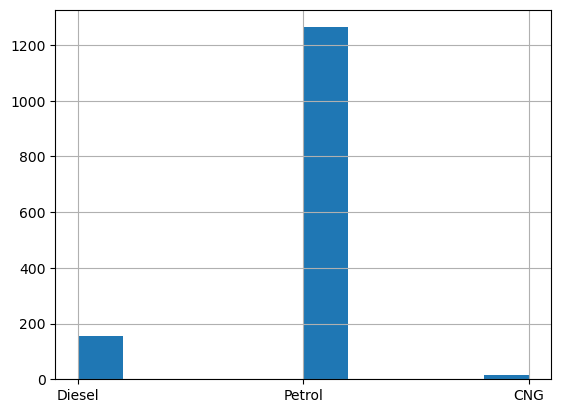

In [15]:
df['Fuel_Type'].hist()

<Axes: >

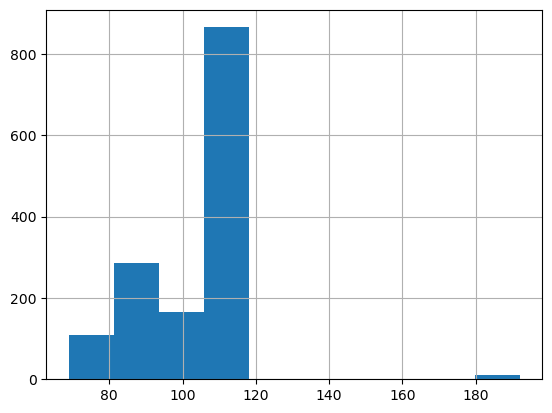

In [16]:
df['HP'].hist()

<Axes: >

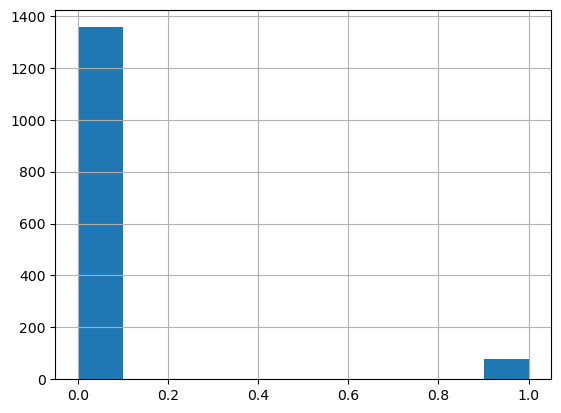

In [17]:
df['Automatic'].hist()

<Axes: >

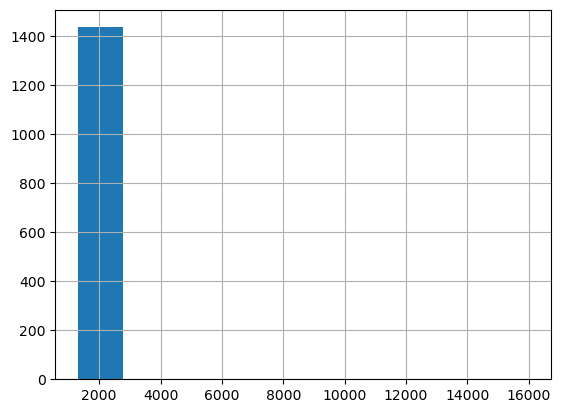

In [18]:
df['cc'].hist()

<Axes: >

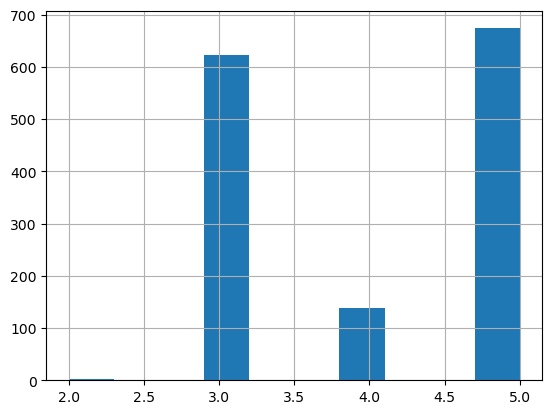

In [19]:
df['Doors'].hist()

<Axes: >

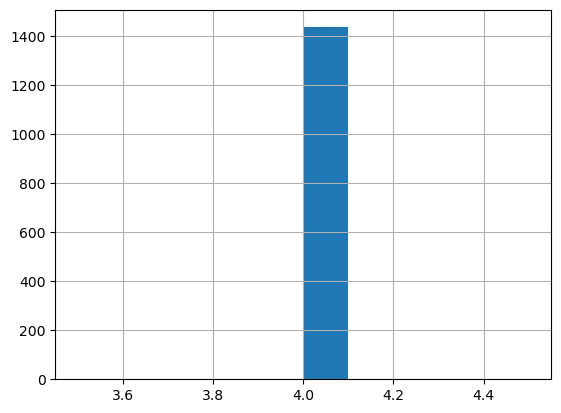

In [20]:
df['Cylinders'].hist()

<Axes: >

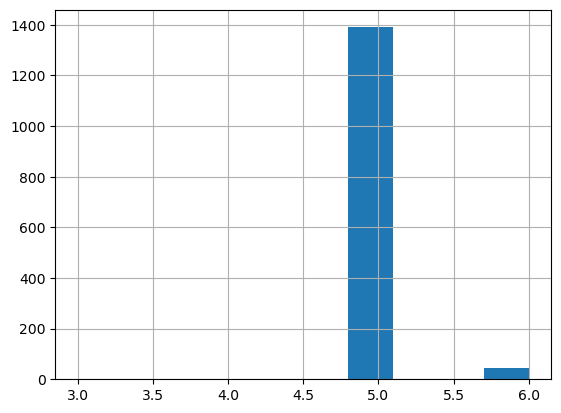

In [21]:
df['Gears'].hist()

<Axes: >

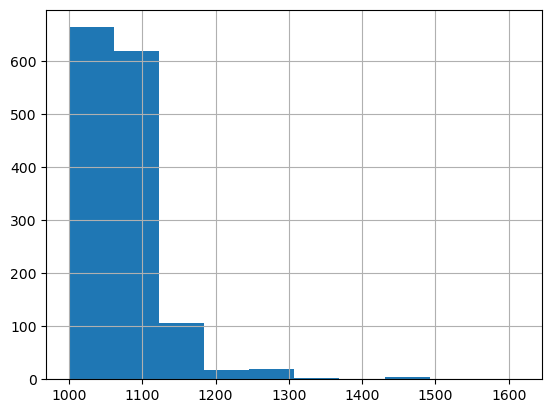

In [22]:
df['Weight'].hist()

In [29]:
# Assigning independent variables to x and dependent variable to y
# Price is the dependent variable to be analyzed and it is to be assigned to y

x = df.drop(['Price'],axis=1)
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [30]:
y = df['Price']
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [31]:
# Fuel type is a categorical column and needs to be converted to numerical
# Assign 1 to Petrol and 2 to Diesel
# GET DUMMIES CONVERTS CATEGORICAL VALUES TO NUMERICAL VALUES
# Joining, adding dummy variables to apply machine learning algorithms

fuel_types=pd.get_dummies(x['Fuel_Type'],drop_first=True)
x = x.drop('Fuel_Type',axis=1)
x = pd.concat([x,fuel_types],axis=1)
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol
0,23,46986,90,0,2000,3,4,5,1165,1,0
1,23,72937,90,0,2000,3,4,5,1165,1,0
2,24,41711,90,0,2000,3,4,5,1165,1,0
3,26,48000,90,0,2000,3,4,5,1165,1,0
4,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,1
1432,72,19000,86,0,1300,3,4,5,1015,0,1
1433,71,17016,86,0,1300,3,4,5,1015,0,1
1434,70,16916,86,0,1300,3,4,5,1015,0,1


In [32]:
# Machine learning model
# Model building, checking validation of the particular model adding training and testing function
# Splitting the model as train and test (80 percent training, 20 percent testing)
# Fixing the training, Testing using random state

import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,y_train

(      Age_08_04      KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
 899          62   59295   86          0  1300      5          4      5   
 881          68   61568  110          0  1600      4          4      5   
 310          40   38653  110          0  1600      5          4      5   
 1145         75  101855  110          0  1600      5          4      5   
 31           22   35199   97          0  1400      3          4      5   
 ...         ...     ...  ...        ...   ...    ...        ...    ...   
 1095         76  125778  110          0  1600      3          4      5   
 1130         73  107108  110          0  1600      3          4      5   
 1294         80   71740  110          0  1600      5          4      5   
 860          63   64690   86          0  1300      3          4      5   
 1126         80  110000  110          0  1600      4          4      5   
 
       Weight  Diesel  Petrol  
 899     1035       0       1  
 881     1035       0       1  
 3

In [33]:
# Data attributes, EDA
# Train size=80, Test size=20
# x(Train and Test,y=train,testing)
# Random state = 42

x_train.shape

(1148, 11)

In [34]:
x_test.shape

(288, 11)

In [35]:
y_train.shape

(1148,)

In [36]:
y_test.shape

(288,)

In [37]:
# Import linear regression model
# Multiple linear regression model
# Model.fit, Best Line fit model
# Y = MX+X , BETA VALUE
# .fit function to check the validation of the multiple linear regression model

import sklearn
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [38]:
# Accuracy to check validation of the data
# Predicted value minus actual value would give you accuracy
# ypred=mx1+mx2_mx3.....mxn+c

y_prediction = LR.predict(x_test)
y_prediction

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [39]:
# R2 Score
# R2 score is zero meaning there is no corelation between DV and IV
# R2 score is 1 meaning there is 100 percent prediction of the data
# Metrics automatically it uses formulae to calculate
# Test score is 83 percent so it shows it is a good model

import numpy as np
from sklearn.metrics import r2_score
score=r2_score(y_test,y_prediction)
score

0.8348888040611084

In [40]:
# Applying Lasso regression

from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [41]:
lasso_reg.score(x_train,y_train)

0.8641664614994273

In [42]:
lasso_reg.score(x_test,y_test)

0.8517382434607914

In [ ]:
# Training score is 86 percent and testing score is 85 percent
# This is a very good model as it is close to 100 percent

In [43]:
# Applying Ridge regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [44]:
ridge_reg.score(x_train,y_train)

0.8687208906359188

In [45]:
ridge_reg.score(x_test,y_test)

0.843487009834434

In [ ]:
# Training score is 86 percent and testing score is 84 percent
# This is a very good model as it is close to 100 percent